## XGBoost
- 하드웨어 최적화를 시킨 Gradient Boosting Model

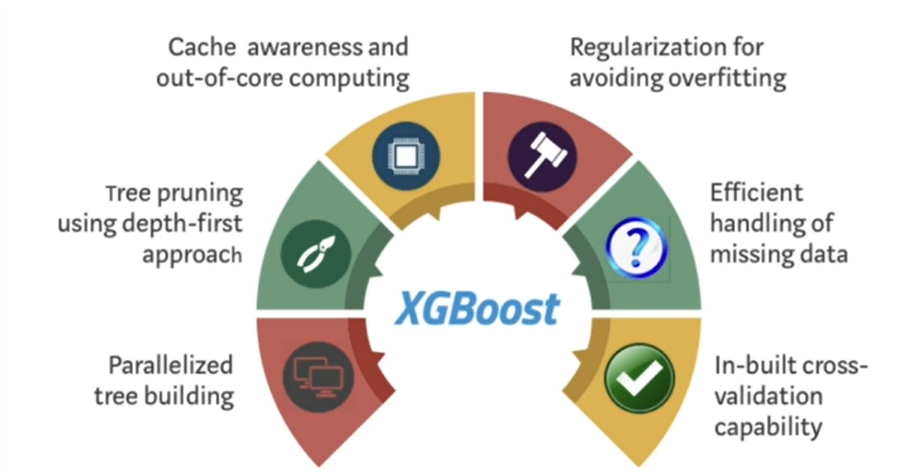

- Boosting & Gradient Boosting
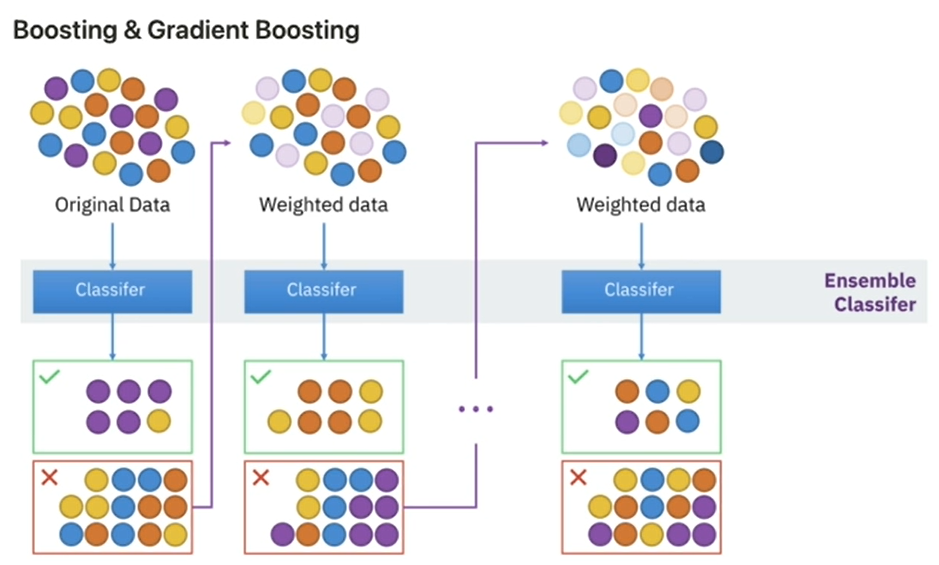

- Boosting model은 Bagging 방식이 만들어지는 원리가 전체 성능을 향상하는데 직접적인 연관이 없는 것을 보완한 모델이다.
- Sequential model이다.
- 첫번째로 만든 DT가 잘못 분류한 친구들을 그 다음 DT가 보완하는 방식으로 순차적으로 Tree를 build한다. 
- 다음 DT는 이전의 DT가 잘못 분류한 데이터들에 weight를 주는 것으로 DT가 뽑은 데이터의 sampling을 조절한다.

- Gradient descent algorithm을 boosting model에 도입해서, 다음 DT가 이전 DT와 합쳐져서 더 적은 loss를 가지게 되는 방향으로 DT를 만드는 방법을 Gradient Boosting Model이라고 한다.

### XGBoost 
- Gradient Boosting model + System Optimization
- tree의 best split point를 찾을 때, feature를 정렬하는게 가장 큰 cost를 소모한다는 점을 확인
- 정렬하는 비용을 block 단위로 잘라서 update하는 방식을 제안하여 GBM과 거의 유사한 성능을 내는 방식을 제안
- 훨씬 더 빠르게 정렬한 내용들을 사용할 수 있게 시스템 최적화를 한다.

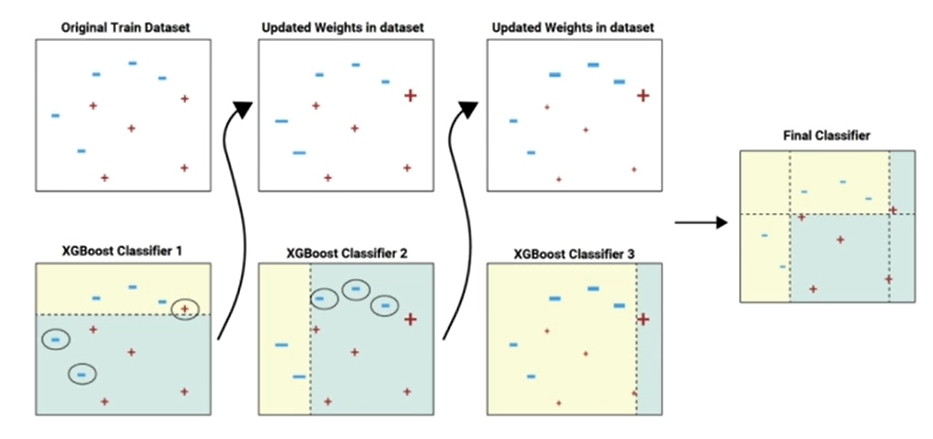

## LightGBM
- 기존 GBM들보다 훨씬 더 빠르게 학습이 되는 모델

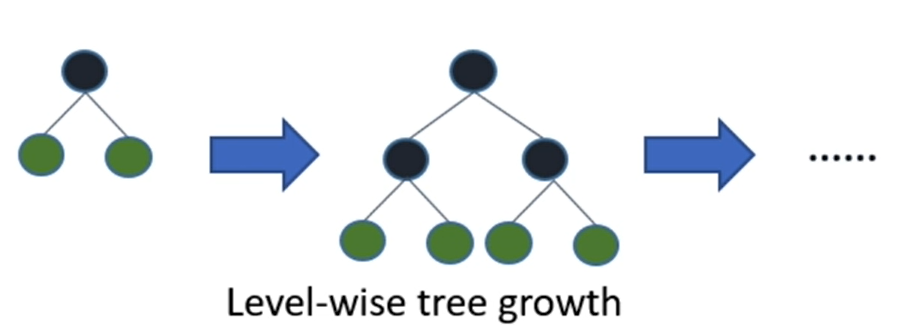

- 기존의 GBM들은 Level-wise 방식으로 tree를 build했다.
- Level-wise이라는건 DT가 학습을 할 때, 같은 level에 있는 노드들을 모두 split한 뒤에 다음 level로 넘어가는 방식을 이야기 한다.(Breadth-First Search)
- 깊이가 너무 커지면 overfitting될 가능성이 높기 때문에, Level을 제한하여 최대한 모델을 키우는 방식을 사용해왔다. (Model Generalization)

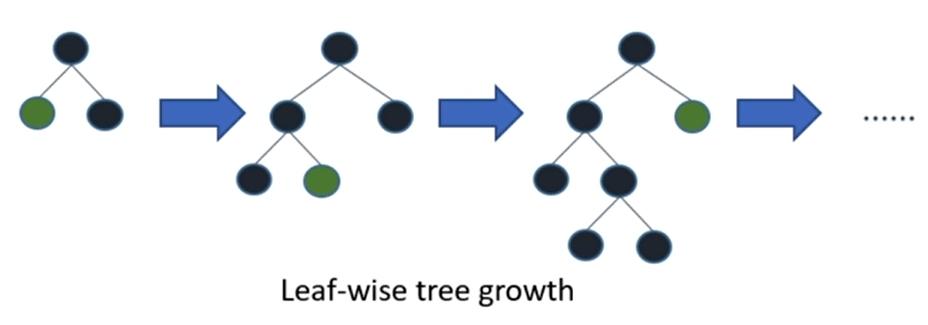

- LightGBM이 제안하는 메인 아이디어는 Level-wise 방식이나 Leaf-wise 방식 모두 optimal을 만들게 된다면 비슷한 DT를 만들게 된다는 것에서 시작한다.
- Leaf-wise를 사용한다면, 훨씬 더 빠르게 optimal을 찾을 수 있다는 것이 포인트이다.
- 전체 Loss가 줄어든느 방향으로 node를 선정해서 split을 한다. 이 때 level을 유지하려는 경향을 포기한다.
- 필요한 노드들만 split하면 되기 때문에, 기존 GBM들과 비교했을 때 훨씬 빠르게 학습이 가능하다는 장점이 있다. 
- 단, 적은 데이터를 사용하게 되면 overfitting이 될 가능성이 높아진다. 
- 다른 GBM들에 비해 hyper-parameter sensitive하다. 

## Mini PJT

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame=True)['data']
y = fetch_california_housing(as_frame=True)['target']
data = pd.concat([X, y], axis=1)

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


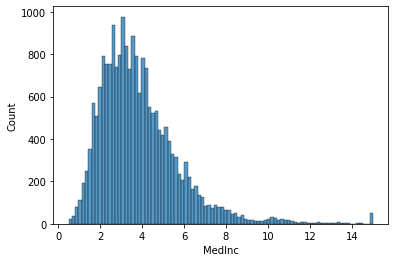

In [5]:
sns.histplot(data=data, x='MedInc')

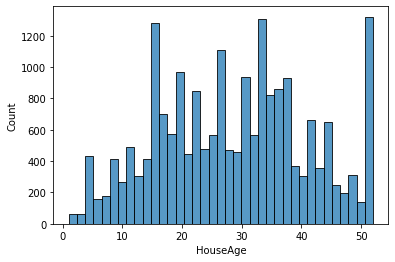

In [6]:
sns.histplot(data=data, x='HouseAge')

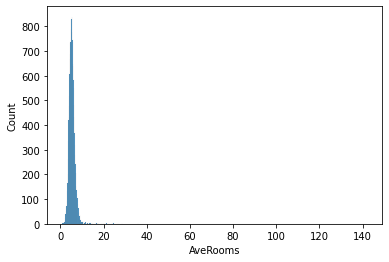

In [7]:
sns.histplot(data=data, x='AveRooms')

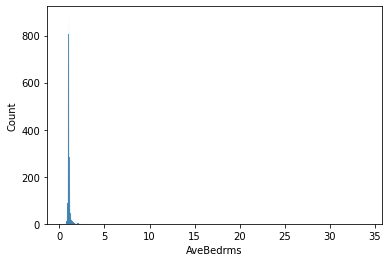

In [8]:
sns.histplot(data=data, x='AveBedrms')

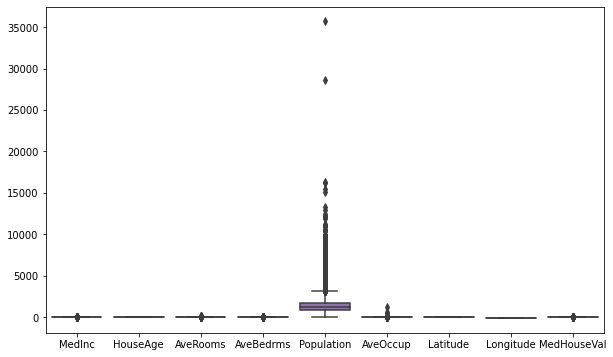

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)

In [10]:
l = data.columns.tolist()
l.remove('Population')
l

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

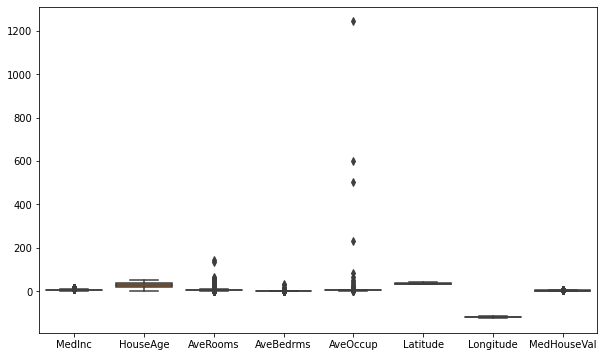

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data.loc[:, l])

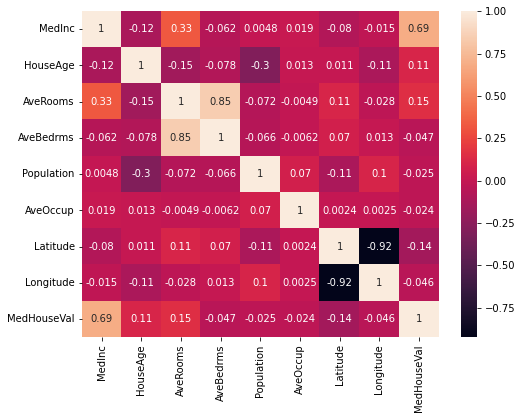

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)

In [23]:
#data.loc[data.AveRooms > 100, : ] # 1914, 1979 row 제거
#data.loc[data.AveOccup > 200, :] # 3364, 13034, 16669, 19006 row 제거

# AveBedroms, Longitude column 제거

#data = data.drop(index=[1914, 1979, 3364, 13034, 16669, 19006]) # remove outlier
#data = data.drop(columns=['AveBedrms', 'Longitude']) # remove collinearity
data

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,0.847


In [25]:
# 학습을 위한 training / text dataset 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(12384, 8) (4128, 8) (4128, 8) (12384,) (4128,) (4128,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

from sklearn.metrics import mean_squared_error

In [31]:
reg = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

reg.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_train2 = reg2.predict(X_train)
pred_train3 = reg3.predict(X_train)
pred_train4 = reg4.predict(X_train)
pred_train5 = reg5.predict(X_train)

pred_val = reg.predict(X_val)
pred_val2 = reg2.predict(X_val)
pred_val3 = reg3.predict(X_val)
pred_val4 = reg4.predict(X_val)
pred_val5 = reg5.predict(X_val)

mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)
mse_train3 = mean_squared_error(y_train, pred_train3)
mse_val3 = mean_squared_error(y_val, pred_val3)
mse_train4 = mean_squared_error(y_train, pred_train4)
mse_val4 = mean_squared_error(y_val, pred_val4)
mse_train5 = mean_squared_error(y_train, pred_train5)
mse_val5 = mean_squared_error(y_val, pred_val5)

print("1. Linear Regression, train/val = %.4f, %.4f" % (mse_train, mse_val))
print("2. Lasso, train/val = %.4f, %.4f" % (mse_train2, mse_val2))
print("1. Ridge, train/val = %.4f, %.4f" % (mse_train3, mse_val3))
print("1. XGBoost, train/val = %.4f, %.4f" % (mse_train4, mse_val4))
print("1. LightGBM, train/val = %.4f, %.4f" % (mse_train5, mse_val5))

[04:39:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1. Linear Regression, train/val = 0.5144, 0.5297
2. Lasso, train/val = 1.3246, 1.3734
1. Ridge, train/val = 0.5144, 0.5297
1. XGBoost, train/val = 0.2596, 0.2885
1. LightGBM, train/val = 0.1450, 0.2264


In [32]:
result = reg.predict(X_test)
result2 = reg2.predict(X_test)
result3 = reg3.predict(X_test)
result4 = reg4.predict(X_test)
result5 = reg5.predict(X_test)

In [34]:
print("1. Linear Regression, result = %.4f" % mean_squared_error(y_test, result))
print("2. Lasso, result = %.4f" % mean_squared_error(y_test, result2))
print("1. Ridge, result = %.4f" % mean_squared_error(y_test, result3))
print("1. XGBoost, result = %.4f" % mean_squared_error(y_test, result4))
print("1. LightGBM, result = %.4f" % mean_squared_error(y_test, result5))

1. Linear Regression, result = 0.5618
2. Lasso, result = 1.3106
1. Ridge, result = 0.5617
1. XGBoost, result = 0.2967
1. LightGBM, result = 0.2164


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3, 5, -1],
    'learning_rate' : [0.1, 0.01],
    'n_estimators' : [50, 100, 200]
}

gcv = GridSearchCV(reg5, param_grid, scoring='neg_mean_squared_error', verbose=1)
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)
print(gcv.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
LGBMRegressor(n_estimators=200)
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}


In [40]:
final_model = gcv.best_estimator_